# Recommendation System (Collaborative Filtering)

### Importing Required Libraries

In [1]:
# Basic Libraries for data and arrays
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# MySQL connection
import mysql.connector

# Ignoring unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Connecting MySQL Database

In [2]:
# Connecting trendscout database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="xxx",
  database="trendskout_test"
)
mycursor = mydb.cursor()

# Extracting recommendation table
mycursor.execute("SELECT * FROM recommendation")

myresult = mycursor.fetchall()

In [3]:
# Selecting top 5 tuples
myresult[:5]

[(73, 21, 3999),
 (83, 21, 3760),
 (111, 21, 4248),
 (117, 21, 3746),
 (119, 21, 3747)]

### Creating DataFrame

In [4]:
df_rec = pd.DataFrame(myresult, columns=['id','order_id','product_id'])
df_rec

,id,order_id,product_id
0,73,21,3999
1,83,21,3760
2,111,21,4248
3,117,21,3746
4,119,21,3747
...,...,...,...
41285,406202,53905,8883
41286,406208,53905,5398
41287,406214,53905,8956
41288,406242,53908,8826


### Exploratory Data Analysis

In [5]:
# check order item quantity, plot

In [6]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41290 entries, 0 to 41289
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          41290 non-null  int64
 1   order_id    41290 non-null  int64
 2   product_id  41290 non-null  int64
dtypes: int64(3)
memory usage: 967.9 KB


In [7]:
df_rec.shape

(41290, 3)

In [8]:
# Production frequency
df_rec.product_id.value_counts()

5076     1497
3949     1464
3947     1261
5733      838
4038      669
         ... 
5550        1
9152        1
9140        1
6169        1
10976       1
Name: product_id, Length: 950, dtype: int64

In [9]:
# order_id frequency
df_rec.order_id.value_counts()

46241    40
41281    30
33000    29
46906    29
42892    26
         ..
32534     1
32535     1
32544     1
32547     1
27648     1
Name: order_id, Length: 20201, dtype: int64

In [10]:
df_rec.head()

,id,order_id,product_id
0,73,21,3999
1,83,21,3760
2,111,21,4248
3,117,21,3746
4,119,21,3747


### Most Popular 20 Products

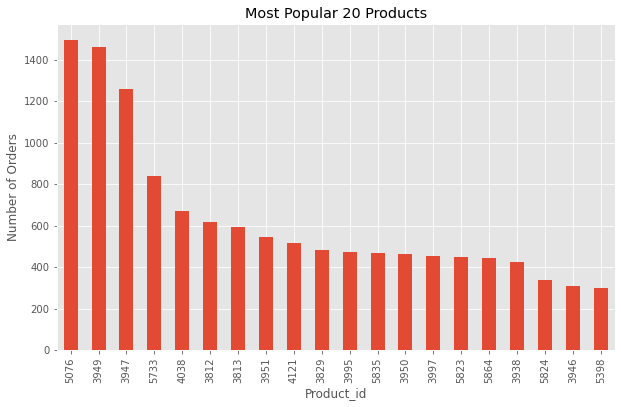

In [11]:
plt.figure(figsize=(10,6))
df_rec.product_id.value_counts().head(20).plot(kind='bar')
plt.title('Most Popular 20 Products')
plt.xlabel('Product_id')
plt.ylabel('Number of Orders');

In [12]:
# cheking id uniqueness
df_rec.id.value_counts()

73        1
262076    1
262331    1
262333    1
262334    1
         ..
131852    1
131853    1
131866    1
131868    1
406243    1
Name: id, Length: 41290, dtype: int64

In [13]:
# Checking if same product listed in same order
df_rec.groupby(['order_id','product_id'])['product_id'].count().sort_values(ascending=False)

order_id  product_id
33000     5799          9
46241     5894          8
33000     5824          8
50589     8827          8
46241     5797          7
                       ..
19824     3947          1
          3949          1
          4129          1
19829     3947          1
53908     8826          1
Name: product_id, Length: 40242, dtype: int64

In [14]:
# Cheking specifically order 33000
df_rec[df_rec['order_id']==33000]

,id,order_id,product_id
24407,225313,33000,5799
24408,225314,33000,5824
24409,225315,33000,8822
24410,225316,33000,8823
24411,225318,33000,5799
24412,225319,33000,5824
24413,225320,33000,5822
24414,225321,33000,8822
24415,225322,33000,8823
24416,225324,33000,5799


In [15]:
df_rec.drop('id', axis=1)

,order_id,product_id
0,21,3999
1,21,3760
2,21,4248
3,21,3746
4,21,3747
...,...,...
41285,53905,8883
41286,53905,5398
41287,53905,8956
41288,53908,8826


In [16]:
# Reordering dataframe, assigning order and product under same index
df_basket = pd.DataFrame(df_rec.groupby(['order_id','product_id'])['product_id'].count())
df_basket

product_id
order_id product_id            
18       4084                 1
21       3746                 1
         3747                 1
         3760                 1
         3938                 1
...                         ...
53905    5398                 1
         8883                 1
         8956                 1
53908    5076                 1
         8826                 1

[40242 rows x 1 columns]

In [17]:
df_basket.columns

Index(['product_id'], dtype='object')

In [18]:
df_basket.shape

(40242, 1)

In [19]:
# Assigning Column name as Quantity for products
df_basket.columns=['Quantity']

In [20]:
df_basket

Quantity
order_id product_id          
18       4084               1
21       3746               1
         3747               1
         3760               1
         3938               1
...                       ...
53905    5398               1
         8883               1
         8956               1
53908    5076               1
         8826               1

[40242 rows x 1 columns]

In [21]:
# Decreasing multi-indexing to single index
df_basket_ind = df_basket.reset_index(level=[0,1])
df_basket_ind

,order_id,product_id,Quantity
0,18,4084,1
1,21,3746,1
2,21,3747,1
3,21,3760,1
4,21,3938,1
...,...,...,...
40237,53905,5398,1
40238,53905,8883,1
40239,53905,8956,1
40240,53908,5076,1


In [22]:
# Checking index
df_basket_ind.index

RangeIndex(start=0, stop=40242, step=1)

In [23]:
# Cheking columns
df_basket_ind.columns

Index(['order_id', 'product_id', 'Quantity'], dtype='object')

In [24]:
# Creating pivot table to see each order with product
df_pivot = df_basket_ind.pivot_table(index='order_id', columns=['product_id'], values='Quantity').fillna(0)
df_pivot

product_id,3720,3723,3731,3738,3742,3746,3747,3754,3760,3812,...,12020,12024,12025,12026,12027,12028,14512,14575,14576,19009
order_id,,,,,,,,,,,,,,,,,,,,,
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Confirming Data in Pivot Table

In [25]:
df_pivot.loc[33000][5799]

9.0

In [26]:
df_pivot.loc[46241][5894]

8.0

### Creating a Function That Returns Recommendation For Selected Product

In [27]:
def get_recommendations(product):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = df_pivot.corrwith(df_pivot[product])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['Correlation']).reset_index()
    recommendations = recommendations.sort_values(by='Correlation', ascending=False)
    
    return recommendations

In [28]:
# Recommendation for the product 5799
recommendations = get_recommendations(5799)
recommendations.head()

,product_id,Correlation
361,5799,1.000000
375,5824,0.362633
374,5823,0.177476
622,8823,0.158811
621,8822,0.140867


In [29]:
# Recommendation for the product 5894
recommendations = get_recommendations(5894)
recommendations.head()

,product_id,Correlation
400,5894,1.000000
641,8894,0.397336
359,5797,0.261619
477,6114,0.255881
663,8980,0.241885


In [30]:
# Recommendation for the product 5076
recommendations = get_recommendations(5076)
recommendations.head()

,product_id,Correlation
228,5076,1.000000
351,5733,0.162011
505,6152,0.054461
572,8670,0.053294
336,5589,0.044026


In [31]:
recommendations[1:].head()

,product_id,Correlation
351,5733,0.162011
505,6152,0.054461
572,8670,0.053294
336,5589,0.044026
656,8956,0.041051


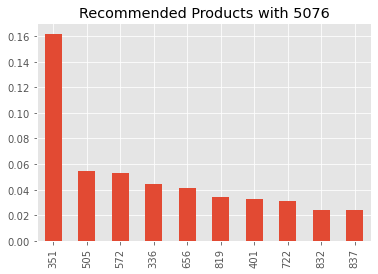

In [32]:
# Correlation bar plot for recommended items
recommendations.Correlation[1:].head(10).plot(kind='bar')
plt.title('Recommended Products with 5076');

### Model Deployment

In [ ]:
import pickle
pickle.dum(model_recom, open('model_recom','wb'))